# 数据

In [1]:
# 导入 TensorFlow
import tensorflow as tf
# 使用 即显模式
tf.enable_eager_execution()

# 训练集
n_example = 100
train_x = tf.random_normal([n_example])
train_noise = tf.random_normal([n_example])
train_y = train_x * 2 - 1 + train_noise

# 测试集
n_example = 10
test_x = tf.random_normal([n_example])
test_noise = tf.random_normal([n_example])
test_y = test_x * 2 - 1 + test_noise

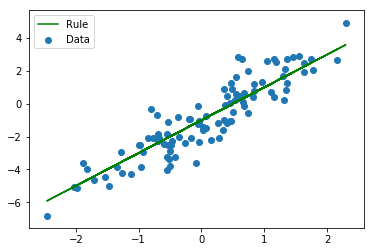

In [3]:
# 显示训练集
import matplotlib.pyplot as plt
plt.plot(train_x, train_y - train_noise, color = 'green')
plt.scatter(train_x, train_y)
plt.legend(['Rule','Data'])
plt.show()

# 模型

In [4]:
import tensorflow.contrib.eager as tfe
# 定义模型
class Model(object):
    def __init__(self):
        # 参数
        # 初始化：随便给 参数 W 和 b 两个值
        self.W = tfe.Variable(1.0)
        self.b = tfe.Variable(1.0)
    
    def __call__(self, x):
        # 正向传递
        # 如何利用 参数 W 和 b 运算
        y = self.W * x + self.b
        return y
# 实例模型
model = Model()

# 训练

Epoch: 000 | Loss: 5.267 | W: 1.077 | b: 0.846
Epoch: 001 | Loss: 4.647 | W: 1.150 | b: 0.704
Epoch: 002 | Loss: 4.115 | W: 1.217 | b: 0.573
Epoch: 003 | Loss: 3.659 | W: 1.281 | b: 0.452
Epoch: 004 | Loss: 3.267 | W: 1.340 | b: 0.339
Epoch: 005 | Loss: 2.930 | W: 1.395 | b: 0.235
Epoch: 006 | Loss: 2.642 | W: 1.447 | b: 0.139
Epoch: 007 | Loss: 2.394 | W: 1.495 | b: 0.050
Epoch: 008 | Loss: 2.182 | W: 1.540 | b: -0.032
Epoch: 009 | Loss: 1.999 | W: 1.582 | b: -0.108
Epoch: 010 | Loss: 1.843 | W: 1.622 | b: -0.179
Epoch: 011 | Loss: 1.709 | W: 1.658 | b: -0.244
Epoch: 012 | Loss: 1.594 | W: 1.693 | b: -0.305
Epoch: 013 | Loss: 1.496 | W: 1.725 | b: -0.360
Epoch: 014 | Loss: 1.411 | W: 1.755 | b: -0.412
Epoch: 015 | Loss: 1.339 | W: 1.783 | b: -0.460
Epoch: 016 | Loss: 1.277 | W: 1.809 | b: -0.504
Epoch: 017 | Loss: 1.224 | W: 1.833 | b: -0.545
Epoch: 018 | Loss: 1.178 | W: 1.856 | b: -0.583
Epoch: 019 | Loss: 1.139 | W: 1.877 | b: -0.618
Epoch: 020 | Loss: 1.106 | W: 1.897 | b: -0.650


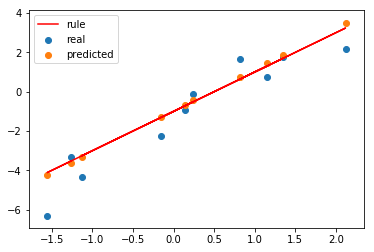

In [5]:
# 误差函数
def loss(prediction, label):
    loss = tf.reduce_mean(tf.square(prediction - label))
    return loss

# 更新方式
def train(model, x, y, learning_rate, batch_size, epoch):
    # 更新次数
    for e in range(epoch):
        # 批量更新
        for b in range(0,len(x.numpy()),batch_size):
            # 计算梯度
            with tf.GradientTape() as tape:
                loss_value = loss(model(x[b:b+batch_size]), y[b:b+batch_size])
                dW, db = tape.gradient(loss_value, [model.W, model.b])
            # 训练更新
            model.W.assign_sub(dW * learning_rate)
            model.b.assign_sub(db * learning_rate)
        # 显示
        print("Epoch: %03d | Loss: %.3f | W: %.3f | b: %.3f" %(e, loss(model(x), y), model.W.numpy(), model.b.numpy()))

# 训练
train(model, train_x, train_y, learning_rate = 0.01, batch_size = 32, epoch = 40)

# 评估
test_p = model(test_x)
print("Final Test Loss: %s" %loss(test_p, test_y).numpy())

# 可视化
plt.plot(test_x,test_y-test_noise,color='red')
plt.scatter(test_x,test_y)
plt.scatter(test_x,test_p)
plt.legend(['rule','real','predicted'])

# 预测
test_p = model([1,2])
print(test_p.numpy())